In [16]:
# Read gpkg
import pandas as pd
import geopandas as gpd
import numpy as np
import json

# Read the GeoPackage file
Kano_MIcat = gpd.read_file('Kano_Covariates_MIcat.gpkg')

# convert to a pandas DataFrame (without the geometry column)
Kano_MIcat_df = pd.DataFrame(Kano_MIcat.drop(columns='geometry'))

# Print the DataFrame
print(Kano_MIcat_df.head())


   SDS_bin  roadlength  Pop_mean  Pop_stddev  ISL_bin  Intersections  \
0        0         0.0       NaN         NaN        0            0.0   
1        0         0.0       NaN         NaN        0            0.0   
2        0         0.0       NaN         NaN        0            0.0   
3        0         0.0       NaN         NaN        0            0.0   
4        0         0.0       NaN         NaN        0            0.0   

   Distance_mean MI_cat  
0    1843.908936   None  
1    1769.180542   None  
2    1697.056274   None  
3    1627.882080   None  
4    1555.634888   None  


In [17]:
#Check null/Nan values in dataset
print(Kano_MIcat_df.isnull().sum())

SDS_bin               0
roadlength            0
Pop_mean         112740
Pop_stddev       112740
ISL_bin               0
Intersections         0
Distance_mean         0
MI_cat           165788
dtype: int64


In [18]:
#replce Nan with 0 in pop columns
Kano_MIcat_df['Pop_stddev'].fillna(0, inplace=True)
Kano_MIcat_df['Pop_mean'].fillna(0, inplace=True)
print(Kano_MIcat_df.isnull().sum())

SDS_bin               0
roadlength            0
Pop_mean              0
Pop_stddev            0
ISL_bin               0
Intersections         0
Distance_mean         0
MI_cat           165788
dtype: int64


In [19]:
from sklearn.preprocessing import LabelEncoder
cat_cols = ['MI_cat']
for var in cat_cols:
    number = LabelEncoder()
    Kano_MIcat_df[var] = number.fit_transform(Kano_MIcat_df[var].astype('str'))

In [20]:
print(Kano_MIcat_df)

        SDS_bin  roadlength  Pop_mean  Pop_stddev  ISL_bin  Intersections  \
0             0         0.0       0.0         0.0        0            0.0   
1             0         0.0       0.0         0.0        0            0.0   
2             0         0.0       0.0         0.0        0            0.0   
3             0         0.0       0.0         0.0        0            0.0   
4             0         0.0       0.0         0.0        0            0.0   
...         ...         ...       ...         ...      ...            ...   
167255        0         0.0       0.0         0.0        0            0.0   
167256        0         0.0       0.0         0.0        0            0.0   
167257        0         0.0       0.0         0.0        0            0.0   
167258        0         0.0       0.0         0.0        0            0.0   
167259        0         0.0       0.0         0.0        0            0.0   

        Distance_mean  MI_cat  
0         1843.908936       3  
1         1

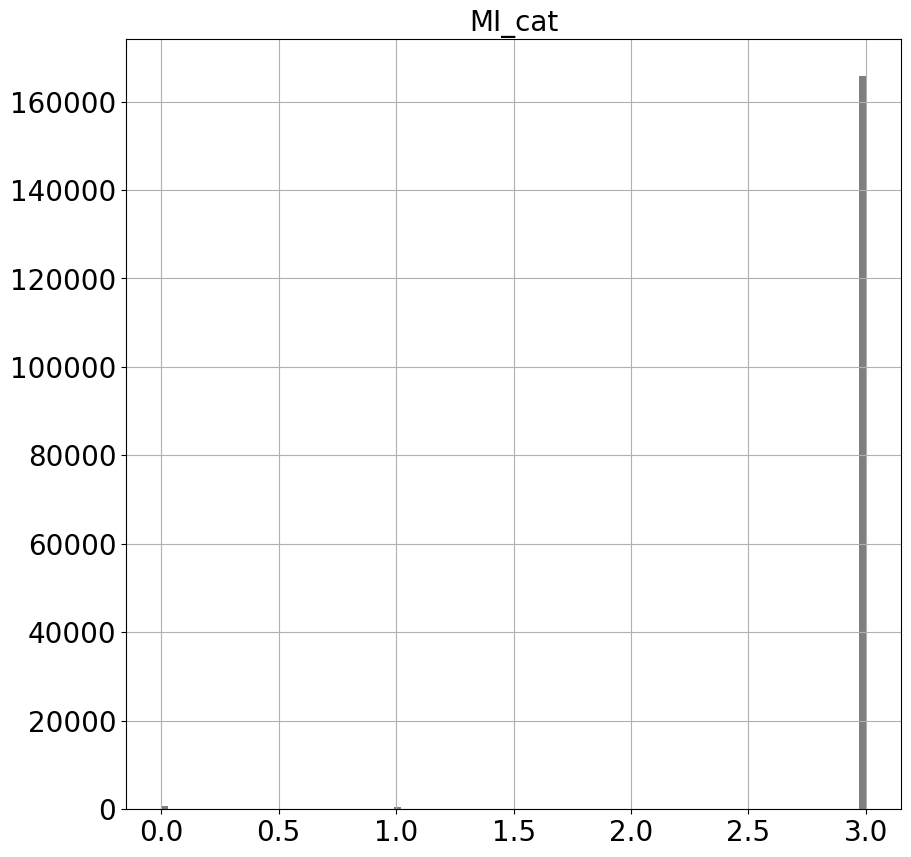

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure()
#uber2014.hist(layout=(5,3), color = 'k', figsize = (100,50),alpha=0.5, bins=100,xlabelsize=50,ylabelsize=50)

Kano_MIcat_df['MI_cat'].hist(color = 'k', figsize = (10,10),alpha=0.5, bins=100,xlabelsize=20,ylabelsize=20)
plt.title('MI_cat',fontsize = 20)
plt.show()

In [22]:
mi_cat_value_counts = Kano_MIcat_df['MI_cat'].value_counts()

# Print the unique values and their counts
print(mi_cat_value_counts)

3    165788
0       728
1       618
2       126
Name: MI_cat, dtype: int64


In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
#from sklearn.grid_search import GridSearchCV   #Perforing grid search

In [24]:
import pandas as pd
import numpy as np
import geopandas as gpd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

# Read the GeoPackage file
#Kano_MIcat = gpd.read_file('Kano_Covariates_MIcat.gpkg')

# Convert it to a pandas DataFrame without the geometry column
#Kano_MIcat_df = pd.DataFrame(Kano_MIcat.drop(columns='geometry'))

# Define feature columns
feature_columns = ['SDS_bin', 'roadlength', 'Pop_mean', 'Pop_stddev', 'ISL_bin', 'Intersections', 'Distance_mean']

# Separate the data into training and prediction sets
train = Kano_MIcat_df[Kano_MIcat_df['MI_cat'] != 3]
predict = Kano_MIcat_df[Kano_MIcat_df['MI_cat'] == 3]

# Define x and y for training
x_train = train[feature_columns]
y_train = train['MI_cat']

# Define x for prediction
x_predict = predict[feature_columns]

# Fit the Gradient Boosting model
gbm = GradientBoostingClassifier(n_estimators=1000)
gbm.fit(x_train, y_train)

# Perform 10-Fold Cross validation
cv_score = np.mean(cross_val_score(gbm, x_train, y_train, cv=10, n_jobs=-1))
print("10-Fold Cross-Validation Score: ", cv_score)

# Predict the values for the rows where MI_cat is 3
predicted_values = gbm.predict(x_predict)

# Assign the predicted values back to the original DataFrame
Kano_MIcat_df.loc[Kano_MIcat_df['MI_cat'] == 3, 'MI_cat'] = predicted_values

# Print the updated DataFrame to verify
print(Kano_MIcat_df.head())


10-Fold Cross-Validation Score:  0.5734693877551021
   SDS_bin  roadlength  Pop_mean  Pop_stddev  ISL_bin  Intersections  \
0        0         0.0       0.0         0.0        0            0.0   
1        0         0.0       0.0         0.0        0            0.0   
2        0         0.0       0.0         0.0        0            0.0   
3        0         0.0       0.0         0.0        0            0.0   
4        0         0.0       0.0         0.0        0            0.0   

   Distance_mean  MI_cat  
0    1843.908936       0  
1    1769.180542       0  
2    1697.056274       0  
3    1627.882080       0  
4    1555.634888       0  


In [30]:
from sklearn.model_selection import cross_val_score, train_test_split

# Now we need to create a test set to evaluate model accuracy
# Split the data again, this time for the purpose of evaluation
train, test = train_test_split(Kano_MIcat_df, test_size=0.24, random_state=42, stratify=Kano_MIcat_df['MI_cat'])

x_test = test[feature_columns]
y_test = test['MI_cat']

# Model accuracy estimate
x_test_value = x_test.values
y_test_value = y_test.values

status = gbm.predict_proba(x_test_value)
y_test_predicted = gbm.predict(x_test_value)
accuracy_test = accuracy_score(y_test_value, y_test_predicted)
print("Test Accuracy: ", accuracy_test)

fpr, tpr, _ = roc_curve(y_test_value, status[:, 1], pos_label=gbm.classes_[1])
roc_auc = auc(fpr, tpr)
print("ROC AUC: ", roc_auc)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


Test Accuracy:  0.9987544528311287
ROC AUC:  0.9995959747805361


In [31]:
# feature importance
importances = gbm.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    
# View a list of the features and their importance scores
list(zip(x_train, gbm.feature_importances_))

Feature ranking:
1. feature 2 (0.414792)
2. feature 0 (0.198077)
3. feature 6 (0.166348)
4. feature 1 (0.109019)
5. feature 4 (0.081146)
6. feature 3 (0.024495)
7. feature 5 (0.006124)


[('SDS_bin', 0.19807728343229944),
 ('roadlength', 0.10901877072929088),
 ('Pop_mean', 0.4147916976158497),
 ('Pop_stddev', 0.024494799494605722),
 ('ISL_bin', 0.08114558491416742),
 ('Intersections', 0.0061241845932860145),
 ('Distance_mean', 0.16634767922050067)]

In [34]:
## Random Forest

In [37]:
# Fit the Random Forest model
rf = RandomForestClassifier(n_estimators=1000, max_features='auto', oob_score=True, n_jobs=-1)
rf.fit(x_train, y_train)

# Perform 10-Fold Cross validation for Random Forest
cv_score_rf = np.mean(cross_val_score(rf, x_train, y_train, cv=10, n_jobs=-1))
print("10-Fold Cross-Validation Score for RF: ", cv_score_rf)

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

10-Fold Cross-Validation Score for RF:  0.5748115462401178


In [40]:
# model accuracy estimate
x_test_value = x_test.values
y_test_value = y_test.values

status = rf.predict_proba(x_test_value)
y_test_predicted = rf.predict(x_test_value)
accuracy_test = accuracy_score(y_test_value, y_test_predicted)
print (accuracy_test)
fpr, tpr, _ = roc_curve(y_test_value, status[:,1])
roc_auc = auc(fpr, tpr)
print (roc_auc)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


0.9262885185461973


ValueError: multiclass format is not supported

Feature ranking:
1. feature 2 (0.366449)
2. feature 6 (0.320803)
3. feature 1 (0.115927)
4. feature 0 (0.110737)
5. feature 4 (0.055917)
6. feature 3 (0.023046)
7. feature 5 (0.007122)


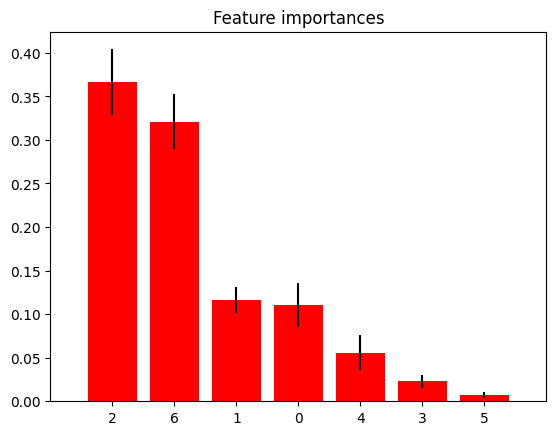

In [41]:
# feature importance
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), indices)
plt.xlim([-1, x_train.shape[1]])
plt.show()

In [38]:
## Adaboost

In [42]:
# Create and fit an AdaBoosted decision tree
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),
                         algorithm="SAMME",
                         n_estimators=1000)

bdt.fit(x_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(max_depth=3),
                   n_estimators=1000)

In [46]:
# Create and fit an AdaBoosted decision tree
bdt = AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier(max_depth=3),
    algorithm="SAMME",
    n_estimators=1000
)
bdt.fit(x_train, y_train)

# 10-Fold Cross validation for AdaBoost
cv_score_bdt = np.mean(cross_val_score(bdt, x_train, y_train, cv=10, n_jobs=-1))
print("10-Fold Cross-Validation Score for AdaBoost: ", cv_score_bdt)

10-Fold Cross-Validation Score for AdaBoost:  0.6047435190292333


In [47]:
# model accuracy estimate
x_test_value = x_test.values
y_test_value = y_test.values

status = bdt.predict_proba(x_test_value)
y_test_predicted = bdt.predict(x_test_value)
accuracy_test = accuracy_score(y_test_value, y_test_predicted)
print (accuracy_test)
fpr, tpr, _ = roc_curve(y_test_value, status[:,1])
roc_auc = auc(fpr, tpr)
print (roc_auc)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


0.8590787933139028


ValueError: multiclass format is not supported

Feature ranking:
1. feature 2 (0.333398)
2. feature 6 (0.281448)
3. feature 1 (0.186426)
4. feature 3 (0.088449)
5. feature 4 (0.056035)
6. feature 0 (0.046633)
7. feature 5 (0.007611)


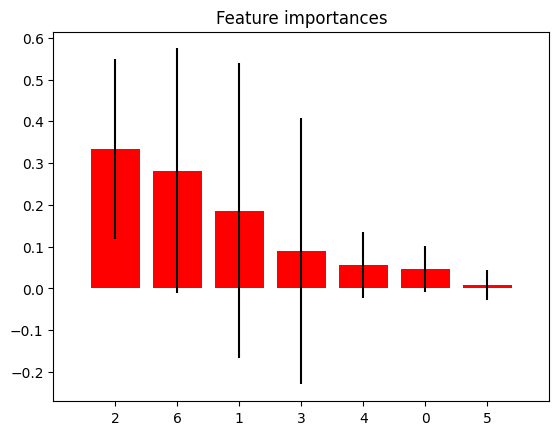

In [48]:
# feature importance
importances = bdt.feature_importances_
std = np.std([tree.feature_importances_ for tree in bdt.estimators_],axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), indices)
plt.xlim([-1, x_train.shape[1]])
plt.show()

In [49]:
### saving only RF model outputs

In [57]:
# Read gpkg
import pandas as pd
import geopandas as gpd
import numpy as np
import json

# Read the GeoPackage file
Kano_MIcat = gpd.read_file('Kano_Covariates_MIcat.gpkg')

# convert to a pandas DataFrame (without the geometry column)
Kano_MIcat_df = pd.DataFrame(Kano_MIcat.drop(columns='geometry'))

# Print the DataFrame
print(Kano_MIcat_df.head())

#Check null/Nan values in dataset
print(Kano_MIcat_df.isnull().sum())

#replce Nan with 0 in pop columns
Kano_MIcat_df['Pop_stddev'].fillna(0, inplace=True)
Kano_MIcat_df['Pop_mean'].fillna(0, inplace=True)
print(Kano_MIcat_df.isnull().sum())

from sklearn.preprocessing import LabelEncoder
cat_cols = ['MI_cat']
for var in cat_cols:
    number = LabelEncoder()
    Kano_MIcat_df[var] = number.fit_transform(Kano_MIcat_df[var].astype('str'))
    
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
#from sklearn.grid_search import GridSearchCV   #Perforing grid search

# Define feature columns
feature_columns = ['SDS_bin', 'roadlength', 'Pop_mean', 'Pop_stddev', 'ISL_bin', 'Intersections', 'Distance_mean']

# Separate the data into training and prediction sets
train = Kano_MIcat_df[Kano_MIcat_df['MI_cat'] != 3]
predict = Kano_MIcat_df[Kano_MIcat_df['MI_cat'] == 3]

# Define x and y for training
x_train = train[feature_columns]
y_train = train['MI_cat']

# Define x for prediction
x_predict = predict[feature_columns]

# Fit the Random Forest model
rf = RandomForestClassifier(n_estimators=1000, max_features='auto', oob_score=True, n_jobs=-1)
rf.fit(x_train, y_train)

# Perform 10-Fold Cross validation for Random Forest
cv_score_rf = np.mean(cross_val_score(rf, x_train, y_train, cv=10, n_jobs=-1))
print("10-Fold Cross-Validation Score for RF: ", cv_score_rf)

# Predict the values for the rows where MI_cat is 3
predicted_values = rf.predict(x_predict)

# Assign the predicted values back to the original DataFrame
Kano_MIcat_df.loc[Kano_MIcat_df['MI_cat'] == 3, 'MI_cat'] = predicted_values

# Save the updated DataFrame to a new file
output_file = 'Kano_MIcat_with_predictions.csv'
Kano_MIcat_df.to_csv(output_file, index=False)

print(f"Predictions saved to {output_file}")


   SDS_bin  roadlength  Pop_mean  Pop_stddev  ISL_bin  Intersections  \
0        0         0.0       NaN         NaN        0            0.0   
1        0         0.0       NaN         NaN        0            0.0   
2        0         0.0       NaN         NaN        0            0.0   
3        0         0.0       NaN         NaN        0            0.0   
4        0         0.0       NaN         NaN        0            0.0   

   Distance_mean MI_cat  
0    1843.908936   None  
1    1769.180542   None  
2    1697.056274   None  
3    1627.882080   None  
4    1555.634888   None  
SDS_bin               0
roadlength            0
Pop_mean         112740
Pop_stddev       112740
ISL_bin               0
Intersections         0
Distance_mean         0
MI_cat           165788
dtype: int64
SDS_bin               0
roadlength            0
Pop_mean              0
Pop_stddev            0
ISL_bin               0
Intersections         0
Distance_mean         0
MI_cat           165788
dtype: int64


/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

10-Fold Cross-Validation Score for RF:  0.5788931788931789
Predictions saved to Kano_MIcat_with_predictions.csv


In [65]:
import pandas as pd
import geopandas as gpd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Read the GeoPackage file
Kano_MIcat = gpd.read_file('Kano_Covariates_MIcat.gpkg')

# Convert to a pandas DataFrame without the geometry column
Kano_MIcat_df = pd.DataFrame(Kano_MIcat.drop(columns='geometry'))

# Print the DataFrame
print(Kano_MIcat_df.head())

# Check for null/NaN values in dataset
print(Kano_MIcat_df.isnull().sum())

# Replace NaN with 0 in population columns
Kano_MIcat_df['Pop_stddev'].fillna(0, inplace=True)
Kano_MIcat_df['Pop_mean'].fillna(0, inplace=True)
print(Kano_MIcat_df.isnull().sum())

# Map categorical values to integers
# Mapping should match the correct values in your dataset
label_map = {'Low': 0, 'Med': 1, 'High': 2}

# Apply the mapping
Kano_MIcat_df['MI_cat'] = Kano_MIcat_df['MI_cat'].map(label_map)

# Identify rows with NaN in MI_cat and fill them with a placeholder value for prediction
Kano_MIcat_df['MI_cat'].fillna(-1, inplace=True)  # Use -1 for rows where MI_cat was NaN

# Define feature columns
feature_columns = ['SDS_bin', 'roadlength', 'Pop_mean', 'Pop_stddev', 'ISL_bin', 'Intersections', 'Distance_mean']

# Separate the data into training and prediction sets
train = Kano_MIcat_df[Kano_MIcat_df['MI_cat'] != -1]  # Use -1 as placeholder
predict = Kano_MIcat_df[Kano_MIcat_df['MI_cat'] == -1]  # Rows where MI_cat was NaN

# Define x and y for training
x_train = train[feature_columns]
y_train = train['MI_cat'].astype(int)  # Ensure y_train is integer type

# Define x for prediction
x_predict = predict[feature_columns]

# Check if x_predict is empty
if x_predict.empty:
    print("x_predict is empty. There are no rows with MI_cat = NaN.")
else:
    # Fit the Random Forest model
    rf = RandomForestClassifier(n_estimators=1000, max_features='auto', oob_score=True, n_jobs=-1)
    rf.fit(x_train, y_train)

    # Perform 10-Fold Cross validation for Random Forest
    cv_score_rf = np.mean(cross_val_score(rf, x_train, y_train, cv=10, n_jobs=-1))
    print("10-Fold Cross-Validation Score for RF: ", cv_score_rf)

    # Predict the values for the rows where MI_cat is NaN
    predicted_values = rf.predict(x_predict)

    # Assign the predicted values back to the original DataFrame
    Kano_MIcat_df.loc[Kano_MIcat_df['MI_cat'] == -1, 'MI_cat'] = predicted_values

    # Save the updated DataFrame with predictions
    output_file_predictions = 'Kano_MIcat_with_predictions.csv'
    Kano_MIcat_df.to_csv(output_file_predictions, index=False)
    print(f"Predictions saved to {output_file_predictions}")

    # Prepare the ingestion CSV with the required columns
    ingestion_df = Kano_MIcat_df.copy()
    ingestion_df['latitude'] = Kano_MIcat.geometry.centroid.y
    ingestion_df['longitude'] = Kano_MIcat.geometry.centroid.x
    ingestion_df['lat_min'] = Kano_MIcat.geometry.bounds['miny']
    ingestion_df['lat_max'] = Kano_MIcat.geometry.bounds['maxy']
    ingestion_df['lon_min'] = Kano_MIcat.geometry.bounds['minx']
    ingestion_df['lon_max'] = Kano_MIcat.geometry.bounds['maxx']
    ingestion_df['result'] = ingestion_df['MI_cat']  # Ensure this column is either 0, 1, or 2

    # Select only the required columns
    ingestion_df = ingestion_df[['latitude', 'longitude', 'lat_min', 'lat_max', 'lon_min', 'lon_max', 'result']]

    # Save the ingestion CSV
    output_file_ingestion = 'Kano_MIcat_ingestion.csv'
    ingestion_df.to_csv(output_file_ingestion, index=False)
    print(f"Ingestion data saved to {output_file_ingestion}")


   SDS_bin  roadlength  Pop_mean  Pop_stddev  ISL_bin  Intersections  \
0        0         0.0       NaN         NaN        0            0.0   
1        0         0.0       NaN         NaN        0            0.0   
2        0         0.0       NaN         NaN        0            0.0   
3        0         0.0       NaN         NaN        0            0.0   
4        0         0.0       NaN         NaN        0            0.0   

   Distance_mean MI_cat  
0    1843.908936   None  
1    1769.180542   None  
2    1697.056274   None  
3    1627.882080   None  
4    1555.634888   None  
SDS_bin               0
roadlength            0
Pop_mean         112740
Pop_stddev       112740
ISL_bin               0
Intersections         0
Distance_mean         0
MI_cat           165788
dtype: int64
SDS_bin               0
roadlength            0
Pop_mean              0
Pop_stddev            0
ISL_bin               0
Intersections         0
Distance_mean         0
MI_cat           165788
dtype: int64


/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

10-Fold Cross-Validation Score for RF:  0.5761720904578047
Predictions saved to Kano_MIcat_with_predictions.csv
Ingestion data saved to Kano_MIcat_ingestion.csv


In [73]:
import pandas as pd
import geopandas as gpd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Read the GeoPackage file
Kano_MIcat = gpd.read_file('Kano_Covariates_MIcat.gpkg')

# Convert from Mollweide (ESRI:54009) to WGS84 (EPSG:4326)
Kano_MIcat = Kano_MIcat.to_crs(epsg=4326)

# Convert to a pandas DataFrame without the geometry column
Kano_MIcat_df = pd.DataFrame(Kano_MIcat.drop(columns='geometry'))

# Print the DataFrame
print(Kano_MIcat_df.head())

# Check for null/NaN values in dataset
print(Kano_MIcat_df.isnull().sum())

# Replace NaN with 0 in population columns
Kano_MIcat_df['Pop_stddev'].fillna(0, inplace=True)
Kano_MIcat_df['Pop_mean'].fillna(0, inplace=True)
print(Kano_MIcat_df.isnull().sum())

# Map categorical values to integers
label_map = {'Low': 0, 'Med': 1, 'High': 2}

# Apply the mapping
Kano_MIcat_df['MI_cat'] = Kano_MIcat_df['MI_cat'].map(label_map)

# Identify rows with NaN in MI_cat and fill them with a placeholder value for prediction
Kano_MIcat_df['MI_cat'].fillna(-1, inplace=True)  # Use -1 for rows where MI_cat was NaN

# Define feature columns
feature_columns = ['SDS_bin', 'roadlength', 'Pop_mean', 'Pop_stddev', 'ISL_bin', 'Intersections', 'Distance_mean']

# Separate the data into training and prediction sets
train = Kano_MIcat_df[Kano_MIcat_df['MI_cat'] != -1]  # Use -1 as placeholder
predict = Kano_MIcat_df[Kano_MIcat_df['MI_cat'] == -1]  # Rows where MI_cat was NaN

# Define x and y for training
x_train = train[feature_columns]
y_train = train['MI_cat'].astype(int)  # Ensure y_train is integer type

# Define x for prediction
x_predict = predict[feature_columns]

# Check if x_predict is empty
if x_predict.empty:
    print("x_predict is empty. There are no rows with MI_cat = NaN.")
else:
    # Fit the Random Forest model
    rf = RandomForestClassifier(n_estimators=1000, max_features='auto', oob_score=True, n_jobs=-1)
    rf.fit(x_train, y_train)

    # Perform 10-Fold Cross validation for Random Forest
    cv_score_rf = np.mean(cross_val_score(rf, x_train, y_train, cv=10, n_jobs=-1))
    print("10-Fold Cross-Validation Score for RF: ", cv_score_rf)

    # Predict the values for the rows where MI_cat is NaN
    predicted_values = rf.predict(x_predict)

    # Assign the predicted values back to the original DataFrame
    Kano_MIcat_df.loc[Kano_MIcat_df['MI_cat'] == -1, 'MI_cat'] = predicted_values

    # Save the updated DataFrame with predictions
    output_file_predictions = 'Kano_MIcat_with_predictions.csv'
    Kano_MIcat_df.to_csv(output_file_predictions, index=False)
    print(f"Predictions saved to {output_file_predictions}")

    # Prepare the ingestion CSV with the required columns
    ingestion_df = Kano_MIcat_df.copy()
    ingestion_df['latitude'] = Kano_MIcat.geometry.centroid.y
    ingestion_df['longitude'] = Kano_MIcat.geometry.centroid.x
    ingestion_df['lat_min'] = Kano_MIcat.geometry.bounds['miny']
    ingestion_df['lat_max'] = Kano_MIcat.geometry.bounds['maxy']
    ingestion_df['lon_min'] = Kano_MIcat.geometry.bounds['minx']
    ingestion_df['lon_max'] = Kano_MIcat.geometry.bounds['maxx']
    ingestion_df['result'] = ingestion_df['MI_cat']  # Ensure this column is either 0, 1, or 2

    # Select only the required columns
    ingestion_df = ingestion_df[['latitude', 'longitude', 'lat_min', 'lat_max', 'lon_min', 'lon_max', 'result']]

    # Save the ingestion CSV
    output_file_ingestion = 'Kano_MIcat_ingestion.csv'
    ingestion_df.to_csv(output_file_ingestion, index=False)
    print(f"Ingestion data saved to {output_file_ingestion}")


   SDS_bin  roadlength  Pop_mean  Pop_stddev  ISL_bin  Intersections  \
0        0         0.0       NaN         NaN        0            0.0   
1        0         0.0       NaN         NaN        0            0.0   
2        0         0.0       NaN         NaN        0            0.0   
3        0         0.0       NaN         NaN        0            0.0   
4        0         0.0       NaN         NaN        0            0.0   

   Distance_mean MI_cat  
0    1843.908936   None  
1    1769.180542   None  
2    1697.056274   None  
3    1627.882080   None  
4    1555.634888   None  
SDS_bin               0
roadlength            0
Pop_mean         112740
Pop_stddev       112740
ISL_bin               0
Intersections         0
Distance_mean         0
MI_cat           165788
dtype: int64
SDS_bin               0
roadlength            0
Pop_mean              0
Pop_stddev            0
ISL_bin               0
Intersections         0
Distance_mean         0
MI_cat           165788
dtype: int64


/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

10-Fold Cross-Validation Score for RF:  0.5734464055892627
Predictions saved to Kano_MIcat_with_predictions.csv


/tmp/ipykernel_802/2516465096.py:76: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  ingestion_df['latitude'] = Kano_MIcat.geometry.centroid.y
/tmp/ipykernel_802/2516465096.py:77: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  ingestion_df['longitude'] = Kano_MIcat.geometry.centroid.x


Ingestion data saved to Kano_MIcat_ingestion.csv


In [2]:
import pandas as pd
import geopandas as gpd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Read the GeoPackage file
Kano_MIcat = gpd.read_file('Nairobi_Covariates_MIcat.gpkg')

# Convert from Mollweide (ESRI:54009) to WGS84 (EPSG:4326)
Kano_MIcat = Kano_MIcat.to_crs(epsg=4326)

# Convert to a pandas DataFrame without the geometry column
Kano_MIcat_df = pd.DataFrame(Kano_MIcat.drop(columns='geometry'))

# Print the DataFrame
print(Kano_MIcat_df.head())

# Check for null/NaN values in dataset
print(Kano_MIcat_df.isnull().sum())

# Replace NaN with 0 in population columns
Kano_MIcat_df['Pop_stddev'].fillna(0, inplace=True)
Kano_MIcat_df['Pop_mean'].fillna(0, inplace=True)
print(Kano_MIcat_df.isnull().sum())

# Map categorical values to integers
label_map = {'Low': 0, 'Med': 1, 'High': 2}

# Apply the mapping
Kano_MIcat_df['MI_cat'] = Kano_MIcat_df['MI_cat'].map(label_map)

# Identify rows with NaN in MI_cat and fill them with a placeholder value for prediction
Kano_MIcat_df['MI_cat'].fillna(-1, inplace=True)  # Use -1 for rows where MI_cat was NaN

# Define feature columns
feature_columns = ['SDS_bin', 'roadlength', 'Pop_mean', 'Pop_stddev', 'ISL_bin', 'Intersections', 'Distance_mean']

# Separate the data into training and prediction sets
train = Kano_MIcat_df[Kano_MIcat_df['MI_cat'] != -1]  # Use -1 as placeholder
predict = Kano_MIcat_df[Kano_MIcat_df['MI_cat'] == -1]  # Rows where MI_cat was NaN

# Define x and y for training
x_train = train[feature_columns]
y_train = train['MI_cat'].astype(int)  # Ensure y_train is integer type

# Define x for prediction
x_predict = predict[feature_columns]

# Check if x_predict is empty
if x_predict.empty:
    print("x_predict is empty. There are no rows with MI_cat = NaN.")
else:
    # Fit the Random Forest model
    rf = RandomForestClassifier(n_estimators=1000, max_features='auto', oob_score=True, n_jobs=-1)
    rf.fit(x_train, y_train)

    # Perform 10-Fold Cross validation for Random Forest
    cv_score_rf = np.mean(cross_val_score(rf, x_train, y_train, cv=10, n_jobs=-1))
    print("10-Fold Cross-Validation Score for RF: ", cv_score_rf)

    # Predict the values for the rows where MI_cat is NaN
    predicted_values = rf.predict(x_predict)

    # Assign the predicted values back to the original DataFrame
    Kano_MIcat_df.loc[Kano_MIcat_df['MI_cat'] == -1, 'MI_cat'] = predicted_values

    # Save the updated DataFrame with predictions
    output_file_predictions = 'Nairobi_MIcat_with_predictions_.csv'
    Kano_MIcat_df.to_csv(output_file_predictions, index=False)
    print(f"Predictions saved to {output_file_predictions}")

    # Prepare the ingestion CSV with the required columns
    ingestion_df = Kano_MIcat_df.copy()
    ingestion_df['latitude'] = Kano_MIcat.geometry.centroid.y
    ingestion_df['longitude'] = Kano_MIcat.geometry.centroid.x
    ingestion_df['lat_min'] = Kano_MIcat.geometry.bounds['miny']
    ingestion_df['lat_max'] = Kano_MIcat.geometry.bounds['maxy']
    ingestion_df['lon_min'] = Kano_MIcat.geometry.bounds['minx']
    ingestion_df['lon_max'] = Kano_MIcat.geometry.bounds['maxx']
    ingestion_df['result'] = ingestion_df['MI_cat']  # Ensure this column is either 0, 1, or 2

    # Select only the required columns
    ingestion_df = ingestion_df[['latitude', 'longitude', 'lat_min', 'lat_max', 'lon_min', 'lon_max', 'result']]

    # Save the ingestion CSV
    output_file_ingestion = 'Nairobi_MIcat_ingestion_.csv'
    ingestion_df.to_csv(output_file_ingestion, index=False)
    print(f"Ingestion data saved to {output_file_ingestion}")

   Distance_mean    Pop_mean  Pop_stddev  SDS_bin  ISL_bin  Intersections  \
0     200.000000   78.279279    0.000000        0        1            0.0   
1     412.310577   93.899248   11.044986        0        0            0.0   
2     500.000000  101.709233    0.000000        0        0            0.0   
3     500.000000  101.709233    0.000000        0        0            0.0   
4     424.264069  101.709233    0.000000        0        0            0.0   

   roadlength MI_cat  
0         0.0   High  
1         0.0   High  
2         0.0   High  
3         0.0    Low  
4         0.0    Low  
Distance_mean         0
Pop_mean          39114
Pop_stddev        39114
SDS_bin               0
ISL_bin               0
Intersections         0
roadlength            0
MI_cat           109818
dtype: int64
Distance_mean         0
Pop_mean              0
Pop_stddev            0
SDS_bin               0
ISL_bin               0
Intersections         0
roadlength            0
MI_cat           109818
dt

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


10-Fold Cross-Validation Score for RF:  0.6633653846153846
Predictions saved to Nairobi_MIcat_with_predictions_.csv


/tmp/ipykernel_482/1080641139.py:76: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  ingestion_df['latitude'] = Kano_MIcat.geometry.centroid.y
/tmp/ipykernel_482/1080641139.py:77: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  ingestion_df['longitude'] = Kano_MIcat.geometry.centroid.x


Ingestion data saved to Nairobi_MIcat_ingestion_.csv


In [4]:
import pandas as pd

# Read the existing ingestion file
input_file_ingestion = 'Nairobi_MIcat_ingestion_.csv'
ingestion_df = pd.read_csv(input_file_ingestion)

# Convert 'result' column to integer
ingestion_df['result'] = ingestion_df['result'].astype(int)

# Save the updated DataFrame to a new CSV file
output_file_ingestion = 'Nairobi_MIcat_ingestion_.csv'
ingestion_df.to_csv(output_file_ingestion, index=False)
print(f"Ingestion data with integer result saved to {output_file_ingestion}")


Ingestion data with integer result saved to Nairobi_MIcat_ingestion_.csv


/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest